# 2. Pré-Processamento

In [33]:
# Configurações de visualização
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']

# Importação das Bibliotecas

# Manipulação
import pandas as pd
import re

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de visualização do dataset
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

In [34]:
# Dados de Treino
df_train3 = pd.read_csv('cars_train3.csv', encoding='utf-8')

In [35]:
# Visualização do dataset de treino
df_train3.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Não Aceita Troca,Mais de um dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Sem Garantia de fábrica,Revisões feitas fora da agenda do carro,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,Mais de um dono,Revisões feitas fora da concessionária,IPVA pago,Não Licenciado,Sem Garantia de fábrica,Revisões feitas fora da agenda do carro,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,Mais de um dono,Revisões feitas fora da concessionária,IPVA Não Pago,Não Licenciado,Sem Garantia de fábrica,Revisões feitas fora da agenda do carro,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,Mais de um dono,Revisões feitas fora da concessionária,IPVA pago,Licenciado,Sem Garantia de fábrica,Revisões feitas fora da agenda do carro,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,Não Aceita Troca,Mais de um dono,Todas as revisões feitas pela concessionária,IPVA Não Pago,Não Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


**OBS:** Com base na análise exploratória realizada, é recomendável:

Excluir a coluna "id" do dataset, pois não contém informações relevantes.

Remover a coluna "veiculo_alienado", pois todos os seus valores são nulos.

Remover a coluna "elegivel_revisao", pois todos os registros possuem o valor "Falso".

Excluir a coluna "ano_modelo", pois a informação já está presente na coluna "ano_de_fabricacao".

Excluir os registros nulos na coluna "num_fotos".

In [36]:
# Excluir a coluna "id"
df_train3.drop('id', axis=1, inplace=True)

# Excluir a coluna  "veiculo_alienado"
df_train3.drop('veiculo_alienado', axis=1, inplace=True)

# Excluir a coluna  "elegivel_revisao"
df_train3.drop('elegivel_revisao', axis=1, inplace=True)

# Excluir a coluna  "ano_modelo"
df_train3.drop('ano_modelo', axis=1, inplace=True)

# Excluir os valores nulos da coluna "num_fotos"
df_train3.dropna(subset=['num_fotos'], inplace=True)

In [37]:
# Trasformar a colunas  "num_fotos" para int64
df_train3['num_fotos'] = df_train3['num_fotos'].astype('int64')

## 2.1 - Criação de Novas Colunas

Nova Coluna: cilindrada

In [38]:
# Função para extrair a cilindrada da coluna versão
def cilindrada(versao):
    match = re.search(r'\d+(\.\d+)?', versao)
    if match:
        return float(match.group())
    else:
        return None

# Aplicar a função para extrair a cilindrada da coluna "versao" e criar a nova coluna "cilindrada"
df_train3['cilindrada'] = df_train3['versao'].apply(cilindrada)

Nova Coluna: tipo_combustivel

In [39]:
# Função para extrair o tipo de combustível da coluna versão
def combustivel(valor):
    padrao = r'\b(FLEX|GASOLINA|DIESEL)\b'
    matches = re.findall(padrao, valor, flags=re.IGNORECASE)
    if matches:
        return matches[0].capitalize()
    else:
        return None

# Aplicar a função na coluna 'versao' e criar uma nova coluna 'tipo_combustivel'
df_train3['tipo_combustivel'] = df_train3['versao'].apply(combustivel)


In [40]:
# Verificar Valores nulos no Dataset
df_train3.isnull().sum().sort_values(ascending=False)

tipo_combustivel           2325
cilindrada                   10
anunciante                    0
preco                         0
revisoes_dentro_agenda        0
garantia_de_fábrica           0
veiculo_licenciado            0
ipva_pago                     0
revisoes_concessionaria       0
veiculo_único_dono            0
dono_aceita_troca             0
troca                         0
entrega_delivery              0
num_fotos                     0
marca                         0
cidade_vendedor               0
tipo_vendedor                 0
cor                           0
blindado                      0
tipo                          0
num_portas                    0
cambio                        0
hodometro                     0
ano_de_fabricacao             0
versao                        0
modelo                        0
estado_vendedor               0
dtype: int64

In [41]:
# Classificar os valores restantes como "Outros"
df_train3['tipo_combustivel'] = df_train3['tipo_combustivel'].fillna('Outros')

In [42]:
# Distribuição tipo de combustível
df_train3['tipo_combustivel'].value_counts()

Flex        14862
Gasolina     7748
Diesel       4472
Outros       2325
Name: tipo_combustivel, dtype: int64

In [43]:
# Verificar novamente Valores nulos no Dataset
df_train3.isnull().sum().sort_values(ascending=False)

cilindrada                 10
num_fotos                   0
anunciante                  0
preco                       0
revisoes_dentro_agenda      0
garantia_de_fábrica         0
veiculo_licenciado          0
ipva_pago                   0
revisoes_concessionaria     0
veiculo_único_dono          0
dono_aceita_troca           0
troca                       0
entrega_delivery            0
estado_vendedor             0
marca                       0
cidade_vendedor             0
tipo_vendedor               0
cor                         0
blindado                    0
tipo                        0
num_portas                  0
cambio                      0
hodometro                   0
ano_de_fabricacao           0
versao                      0
modelo                      0
tipo_combustivel            0
dtype: int64

In [44]:
# Remover linhas com valores nulos
df_train3 = df_train3.dropna()

In [45]:
# Excluir a variável versao pois não é mais necessária
df_train3.drop("versao", axis=1, inplace=True)

In [46]:
# Excluir linha incorreta
cilindradas_90 = df_train3.loc[df_train3['cilindrada'] == df_train3['cilindrada'].max()]
df_train3 = df_train3.drop(cilindradas_90.index)

Nova coluna: modelos_por_marca

In [47]:
# Agrupar os dados por marca e modelo e contar o número de modelos únicos para cada marca
modelos_por_marca = df_train3.groupby('marca')['modelo'].nunique().reset_index()

# Renomear a coluna resultante
modelos_por_marca = modelos_por_marca.rename(columns={'modelo': 'modelos_por_marca'})

# Criar um dicionário de mapeamento usando a coluna de marcas como chave e o número de modelos como valor
map1 = dict(zip(modelos_por_marca['marca'], modelos_por_marca['modelos_por_marca']))

# Aplicar o mapeamento para criar a nova coluna "modelos_por_marca"
df_train3['modelos_por_marca'] = df_train3['marca'].map(map1)

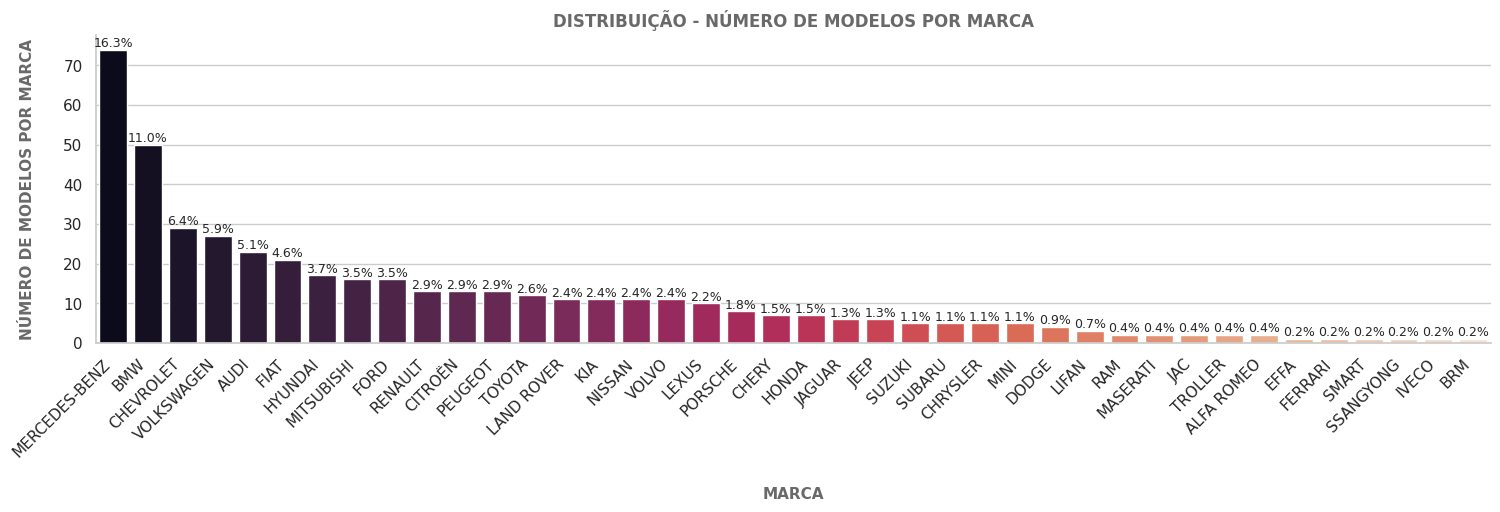

In [48]:
# Gráfico porcentagem
sns.set(style="whitegrid")
plt.figure(figsize=(18, 4))

# Ordenar os dados por número de modelos por marca em ordem decrescente
modelos_por_marca = modelos_por_marca.sort_values('modelos_por_marca', ascending=False)

# Calcular o total de modelos por marca
total_modelos = modelos_por_marca['modelos_por_marca'].sum()

# Criar o gráfico de barras
ax = sns.barplot(x='marca', y='modelos_por_marca', data=modelos_por_marca, palette='rocket', order=modelos_por_marca['marca'])

sns.despine()
plt.title('DISTRIBUIÇÃO - NÚMERO DE MODELOS POR MARCA', fontsize=12,color='dimgrey', fontweight='bold')
# Adicionar os valores em porcentagem em cima das barras
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_modelos)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=9)

plt.xlabel('MARCA', color='dimgrey', labelpad=20, fontweight='bold', fontsize=11)
plt.ylabel('NÚMERO DE MODELOS POR MARCA', color='dimgrey', labelpad=20, fontweight='bold', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.show();

Nova coluna: modelos_por_tipo

In [49]:
# Agrupar os dados por tipo e modelo e contar o número de modelos únicos para cada tipo
modelos_por_tipo = df_train3.groupby('tipo')['modelo'].nunique().reset_index()

# Renomear a coluna resultante
modelos_por_tipo = modelos_por_tipo.rename(columns={'modelo': 'modelos_por_tipo'})

# Criar um dicionário de mapeamento usando a coluna tipo como chave e o número de modelos como valor
map2 = dict(zip(modelos_por_tipo['tipo'], modelos_por_tipo['modelos_por_tipo']))

# Aplicar o mapeamento para criar a nova coluna "modelos_por_tipo"
df_train3['modelos_por_tipo'] = df_train3['tipo'].map(map2)

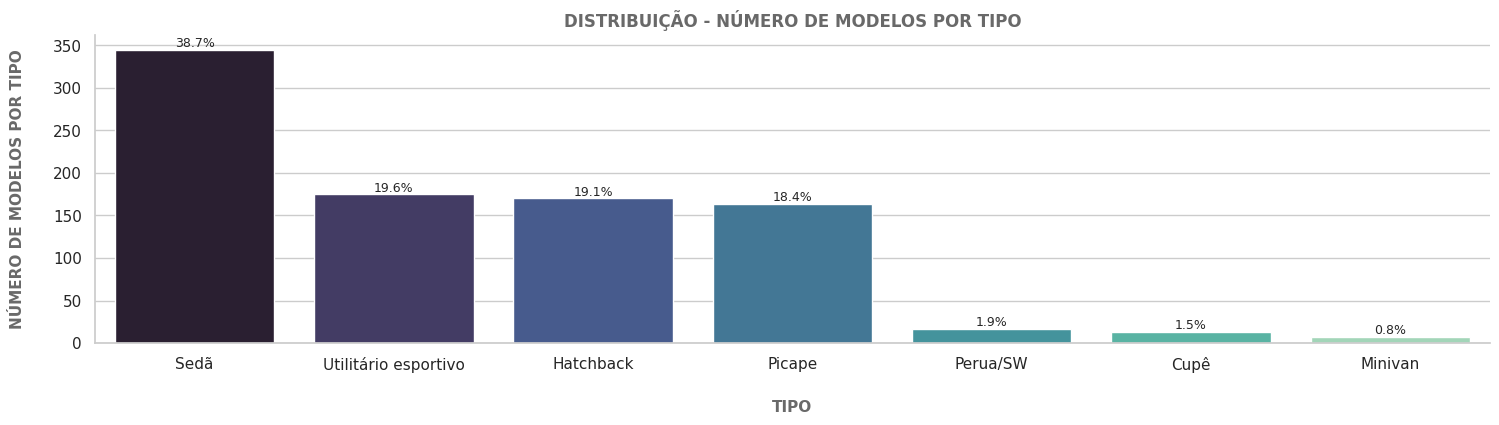

In [50]:
# Gráfico porcentagem
sns.set(style="whitegrid")
plt.figure(figsize=(18, 4))

# Ordenar os dados por número de modelos por tipo em ordem decrescente
modelos_por_tipo = modelos_por_tipo.sort_values('modelos_por_tipo', ascending=False)

# Calcular o total de modelos
total_modelos = modelos_por_tipo['modelos_por_tipo'].sum()

# Criar o gráfico de barras
ax = sns.barplot(x='tipo', y='modelos_por_tipo', data=modelos_por_tipo, palette='mako', order=modelos_por_tipo['tipo'])

sns.despine()
plt.title('DISTRIBUIÇÃO - NÚMERO DE MODELOS POR TIPO', fontsize=12,color='dimgrey', fontweight='bold')
# Adicionar os valores em porcentagem em cima das barras
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_modelos)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=9)

plt.xlabel('TIPO', color='dimgrey', labelpad=20, fontweight='bold', fontsize=11)
plt.ylabel('NÚMERO DE MODELOS POR TIPO', color='dimgrey', labelpad=20, fontweight='bold', fontsize=11)
plt.xticks(rotation=0, ha='center')
plt.show();

Nova coluna: modelos_por_anofabricacao

In [51]:
# Agrupar os dados por ano de fabricação e modelo e contar o número de modelos únicos para cada
modelos_por_anofabricacao = df_train3.groupby('ano_de_fabricacao')['modelo'].nunique().reset_index()

# Renomear a coluna resultante
modelos_por_anofabricacao = modelos_por_anofabricacao.rename(columns={'modelo': 'modelos_por_anofabricacao'})

# Criar um dicionário de mapeamento usando a coluna ano_de_fabricacao como chave e o número de modelos como valor
map3 = dict(zip(modelos_por_anofabricacao['ano_de_fabricacao'], modelos_por_anofabricacao['modelos_por_anofabricacao']))

# Aplicar o mapeamento para criar a nova coluna "modelos_por_anofabricacao"
df_train3['modelos_por_anofabricacao'] = df_train3['ano_de_fabricacao'].map(map3)

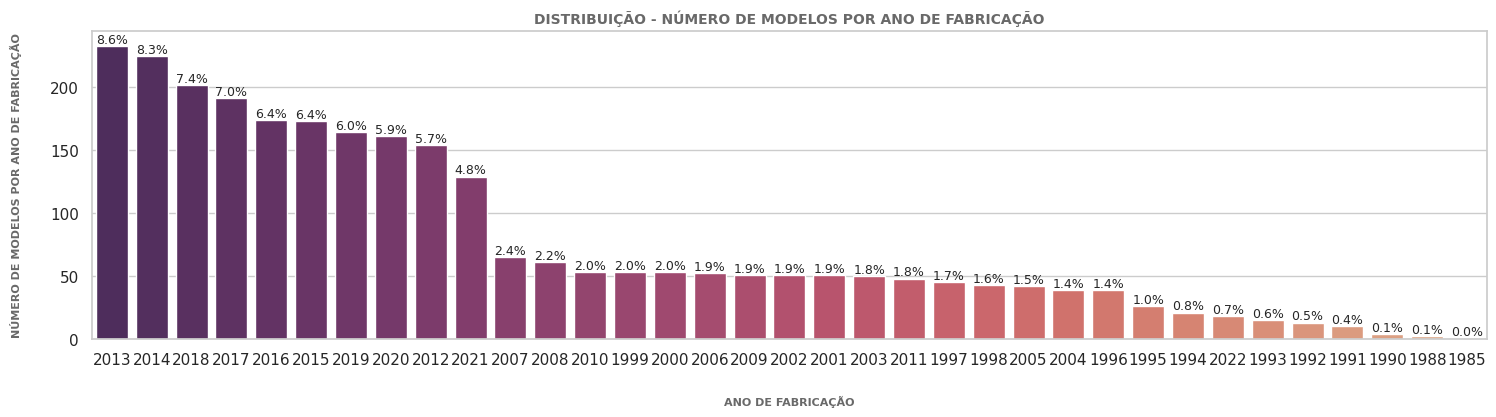

In [52]:
# Gráfico porcentagem
sns.set(style="whitegrid")
plt.figure(figsize=(18, 4))

# Ordenar os dados por número de modelos por ano e fabricação em ordem decrescente
modelos_por_anofabricacao = modelos_por_anofabricacao.sort_values('modelos_por_anofabricacao', ascending=False)

# Calcular o total de modelos
total_modelos = modelos_por_anofabricacao['modelos_por_anofabricacao'].sum()

sns.despine()
plt.title('DISTRIBUIÇÃO - NÚMERO DE MODELOS POR ANO DE FABRICAÇÃO', fontsize=10, color='dimgrey', fontweight='bold')
# Criar o gráfico de barras
ax = sns.barplot(x='ano_de_fabricacao', y='modelos_por_anofabricacao', data=modelos_por_anofabricacao, palette='flare_r', order=modelos_por_anofabricacao['ano_de_fabricacao'])

# Adicionar os valores em porcentagem em cima das barras
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_modelos)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=9)

plt.xlabel('ANO DE FABRICAÇÃO', color='dimgrey', labelpad=20, fontweight='bold', fontsize=8)
plt.ylabel('NÚMERO DE MODELOS POR ANO DE FABRICAÇÃO', color='dimgrey', labelpad=20, fontweight='bold', fontsize=8)
plt.xticks(rotation=0, ha='center')
plt.show();

Nova coluna: modelos_por_estado

In [53]:
# Agrupar os dados por estado e modelo e contar o número de modelos únicos para cada estado
modelos_por_estado = df_train3.groupby('estado_vendedor')['modelo'].nunique().reset_index()

# Renomear a coluna resultante
modelos_por_estado = modelos_por_estado.rename(columns={'modelo': 'modelos_por_estado'})

# Criar um dicionário de mapeamento usando a coluna de estados como chave e o número de modelos como valor
map4 = dict(zip(modelos_por_estado['estado_vendedor'], modelos_por_estado['modelos_por_estado']))

# Aplicar o mapeamento para criar a nova coluna "modelos_por_estado"
df_train3['modelos_por_estado'] = df_train3['estado_vendedor'].map(map4)

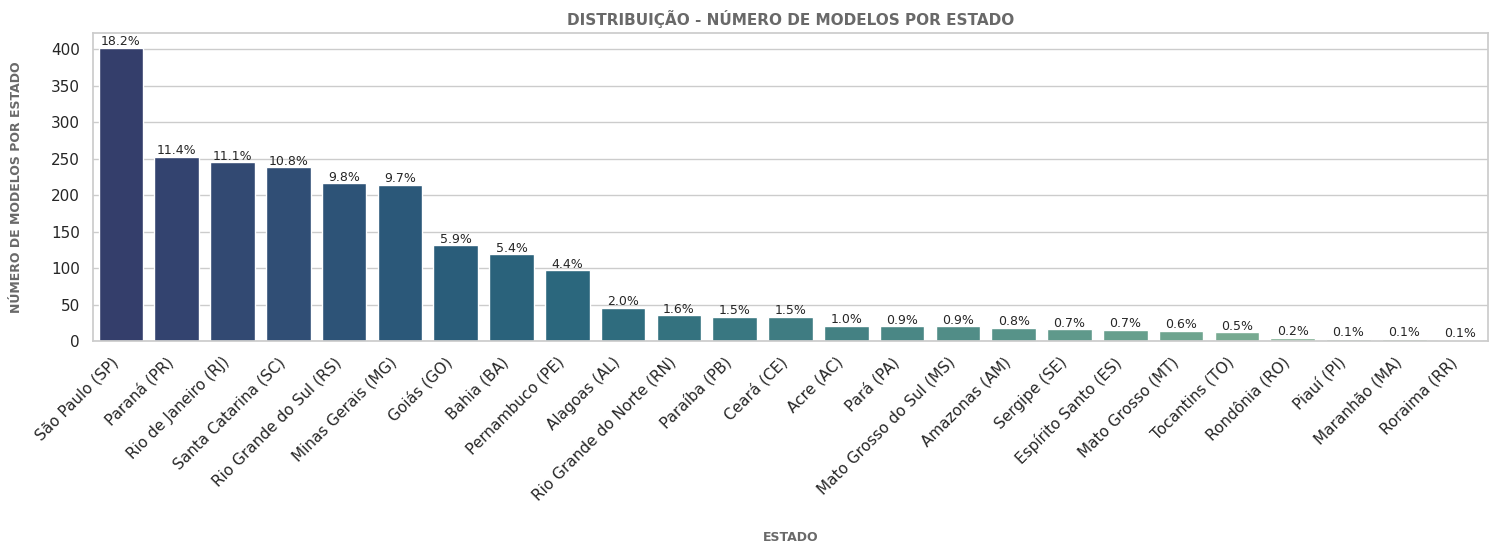

In [54]:
# Gráfico porcentagem
sns.set(style="whitegrid")
plt.figure(figsize=(18, 4))

# Ordenar os dados por número de modelos por estado em ordem decrescente
modelos_por_estado = modelos_por_estado.sort_values('modelos_por_estado', ascending=False)

# Calcular o total de modelos
total_modelos = modelos_por_estado['modelos_por_estado'].sum()

sns.despine()
plt.title('DISTRIBUIÇÃO - NÚMERO DE MODELOS POR ESTADO', fontsize=11, color='dimgrey', fontweight='bold')
# Criar o gráfico de barras
ax = sns.barplot(x='estado_vendedor', y='modelos_por_estado', data=modelos_por_estado, palette='crest_r', order=modelos_por_estado['estado_vendedor'])

# Adicionar os valores em porcentagem em cima das barras
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_modelos)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=9)

plt.xlabel('ESTADO', color='dimgrey', labelpad=20, fontweight='bold', fontsize=9)
plt.ylabel('NÚMERO DE MODELOS POR ESTADO', color='dimgrey', labelpad=20, fontweight='bold', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.show();

Nova coluna: modelos_por_anunciante

In [55]:
# Agrupar os dados por anunciante e modelo e contar o número de modelos únicos para cada anunciante
modelos_por_anunciante = df_train3.groupby('anunciante')['modelo'].nunique().reset_index()

# Renomear a coluna resultante
modelos_por_anunciante = modelos_por_anunciante.rename(columns={'modelo': 'modelos_por_anunciante'})

# Criar um dicionário de mapeamento usando a coluna anunciante como chave e o número de modelos como valor
map5 = dict(zip(modelos_por_anunciante['anunciante'], modelos_por_anunciante['modelos_por_anunciante']))

# Aplicar o mapeamento para criar a nova coluna "modelos_por_anunciante"
df_train3['modelos_por_anunciante'] = df_train3['anunciante'].map(map5)

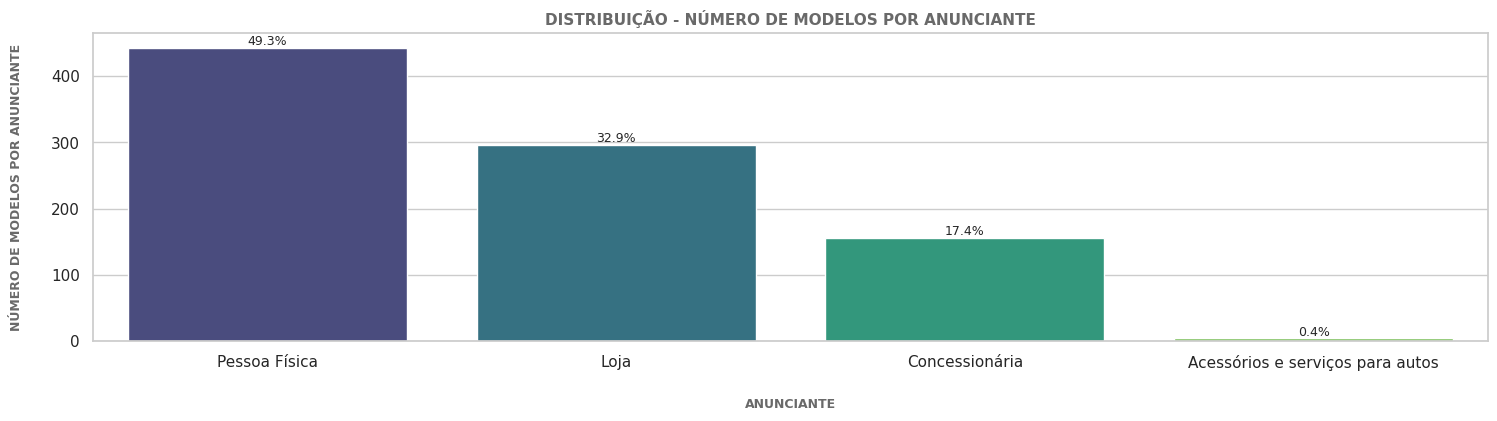

In [56]:
# Gráfico porcentagem
sns.set(style="whitegrid")
plt.figure(figsize=(18, 4))

# Ordenar os dados por número de modelos por anunciante em ordem decrescente
modelos_por_anunciante = modelos_por_anunciante.sort_values('modelos_por_anunciante', ascending=False)

# Calcular o total de modelos
total_modelos = modelos_por_anunciante['modelos_por_anunciante'].sum()

sns.despine()
plt.title('DISTRIBUIÇÃO - NÚMERO DE MODELOS POR ANUNCIANTE', fontsize=11, color='dimgrey', fontweight='bold')
# Criar o gráfico de barras
ax = sns.barplot(x='anunciante', y='modelos_por_anunciante', data=modelos_por_anunciante, palette='viridis', order=modelos_por_anunciante['anunciante'])

# Adicionar os valores em porcentagem em cima das barras
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_modelos)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=9)

plt.xlabel('ANUNCIANTE', color='dimgrey', labelpad=20, fontweight='bold', fontsize=9)
plt.ylabel('NÚMERO DE MODELOS POR ANUNCIANTE', color='dimgrey', labelpad=20, fontweight='bold', fontsize=9)
plt.xticks(rotation=0, ha='center')
plt.show();

Poderiamos criar outras variáveis mas é importante ter em mente os seguintes pontos:

Overfitting: Criar muitas variáveis novas pode levar ao overfitting, prejudicando a capacidade do modelo de generalizar para novos dados.

Complexidade e interpretabilidade: A criação de novas variáveis pode tornar o modelo mais complexo e difícil de interpretar, especialmente se as variáveis forem altamente transformadas ou derivadas.

Tempo e recursos computacionais: A criação de novas variáveis requer tempo e recursos computacionais adicionais, especialmente se envolver cálculos complexos ou métodos de aprendizado não supervisionado.

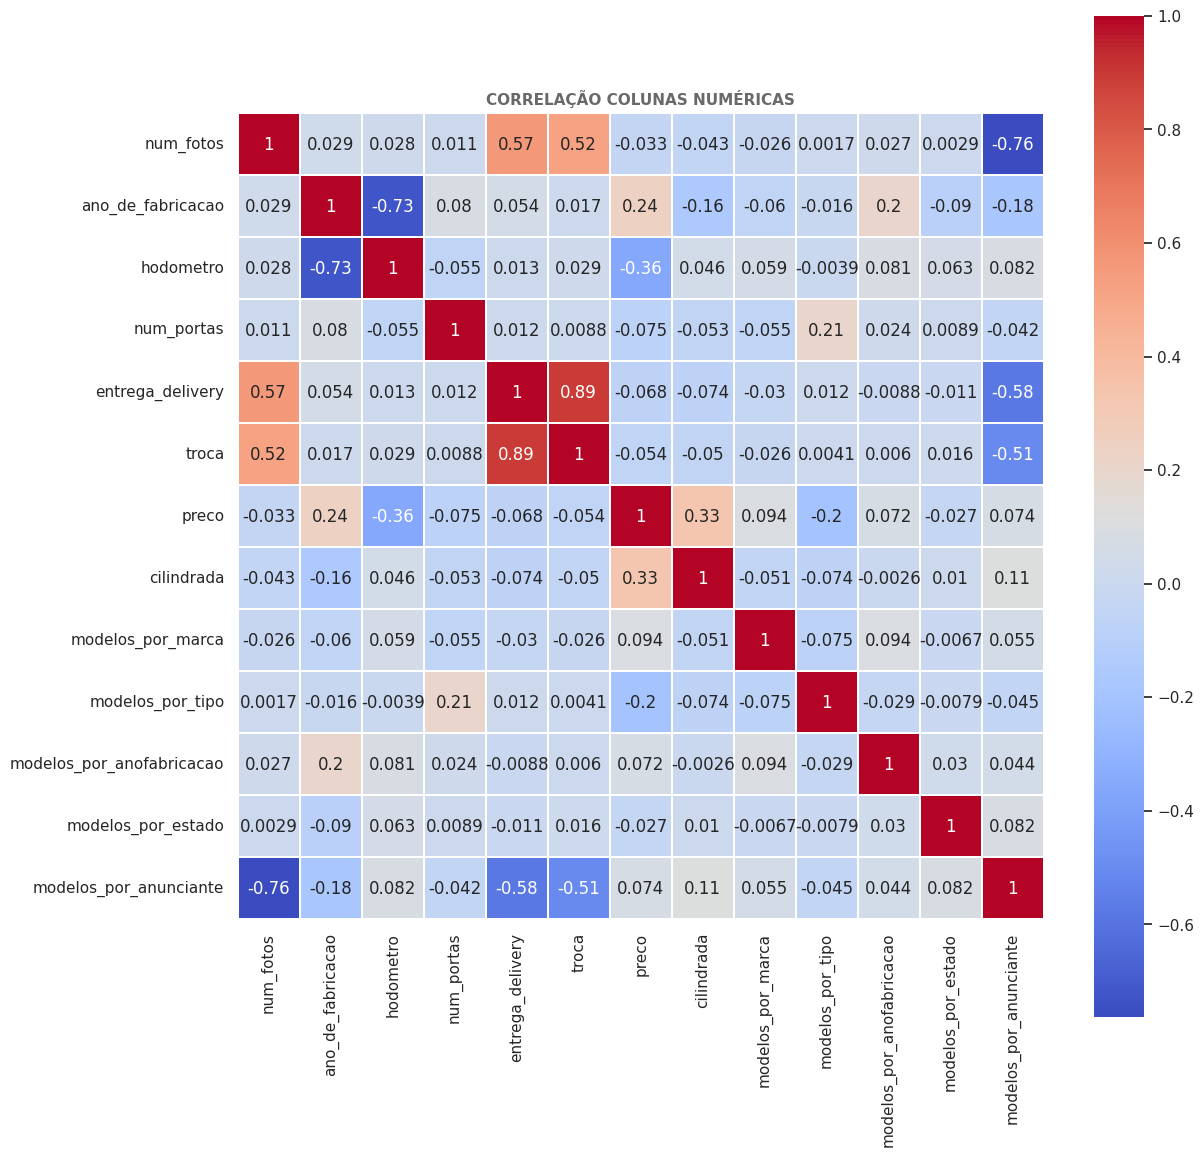

In [57]:
# Correlação entre as colunas
plt.figure(figsize=(13, 13))
sns.heatmap(data=df_train3.corr(), annot=True,
            linewidths=0.2, cmap='coolwarm', square=True)
plt.title('CORRELAÇÃO COLUNAS NUMÉRICAS', fontsize=11,
          color='dimgrey', fontweight='bold')
plt.show();

In [58]:
df_train3.describe()

,num_fotos,ano_de_fabricacao,hodometro,num_portas,preco,cilindrada,modelos_por_marca,modelos_por_tipo,modelos_por_anofabricacao,modelos_por_estado,modelos_por_anunciante
count,29396.000000,29396.000000,29396.000000,29396.000000,2.939600e+04,29396.000000,29396.000000,29396.000000,29396.000000,29396.000000,29396.000000
mean,10.322527,2016.734760,58592.654205,3.940298,1.330561e+05,1.952949,21.588345,266.302286,175.207715,316.325112,377.651619
std,3.486085,4.063892,32578.538272,0.339407,8.180505e+04,1.083880,15.117549,88.130715,40.295620,103.211376,87.634973
min,8.000000,1985.000000,100.000000,2.000000,9.869951e+03,0.600000,1.000000,7.000000,1.000000,2.000000,4.000000
25%,8.000000,2015.000000,31330.750000,4.000000,7.650658e+04,1.500000,12.000000,170.000000,161.000000,238.000000,296.000000
50%,8.000000,2018.000000,57727.000000,4.000000,1.142910e+05,2.000000,17.000000,345.000000,173.000000,402.000000,443.000000
75%,14.000000,2019.000000,82104.250000,4.000000,1.638660e+05,2.000000,27.000000,345.000000,202.000000,402.000000,443.000000
max,21.000000,2022.000000,390065.000000,4.000000,1.359813e+06,60.000000,74.000000,345.000000,233.000000,402.000000,443.000000


**OBS:** Com base nas características do dataset fornecido, é recomendável realizar a padronização dos dados. A padronização é preferível quando as variáveis possuem magnitudes e unidades diferentes. No entanto, é importante mencionar que para algoritmos baseados em árvores a padronização não é estritamente necessária, pois esses algoritmos não são afetados pelas diferenças de escala.

A disposição das colunas está uma bagunça, vamos rearranjá-las::

In [59]:
# Mudando a ordem das colunas
df_train3 = df_train3.reindex(columns=['num_fotos', 'marca', 'modelo', 'modelos_por_marca', 'modelos_por_tipo',
                                            'modelos_por_anofabricacao','modelos_por_estado', 'modelos_por_anunciante',
                                              'ano_de_fabricacao', 'hodometro', 'cambio','tipo', 'blindado', 'cor',
                                                'num_portas', 'cilindrada', 'tipo_combustivel', 'tipo_vendedor',
                                                'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery',
                                                  'troca', 'dono_aceita_troca','veiculo_único_dono', 'ipva_pago',
                                                    'veiculo_licenciado', 'revisoes_concessionaria', 'revisoes_dentro_agenda',
                                                    'garantia_de_fábrica', 'preco'])

In [60]:
# Visualizar o dataset
df_train3.head()

,num_fotos,marca,modelo,modelos_por_marca,modelos_por_tipo,modelos_por_anofabricacao,modelos_por_estado,modelos_por_anunciante,ano_de_fabricacao,hodometro,cambio,tipo,blindado,cor,num_portas,cilindrada,tipo_combustivel,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,ipva_pago,veiculo_licenciado,revisoes_concessionaria,revisoes_dentro_agenda,garantia_de_fábrica,preco
0,8,NISSAN,KICKS,11,345,191,402,443,2017,67772.0,CVT,Sedã,N,Branco,4,1.6,Outros,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,Não Aceita Troca,Mais de um dono,IPVA pago,Licenciado,Todas as revisões feitas pela concessionária,Revisões feitas fora da agenda do carro,Sem Garantia de fábrica,74732.590084
1,8,JEEP,COMPASS,6,345,191,214,443,2017,62979.0,Automática,Sedã,N,Branco,4,2.0,Flex,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,Aceita troca,Mais de um dono,IPVA pago,Não Licenciado,Revisões feitas fora da concessionária,Revisões feitas fora da agenda do carro,Sem Garantia de fábrica,81965.332634
2,16,KIA,SORENTO,11,345,202,402,296,2018,44070.0,Automática,Sedã,N,Preto,4,2.4,Gasolina,PJ,Santos,São Paulo (SP),Loja,True,False,Aceita troca,Mais de um dono,IPVA Não Pago,Não Licenciado,Revisões feitas fora da concessionária,Revisões feitas fora da agenda do carro,Sem Garantia de fábrica,162824.814472
3,14,VOLKSWAGEN,AMAROK,27,164,233,402,296,2013,85357.0,Automática,Picape,N,Branco,4,2.0,Diesel,PJ,Sorocaba,São Paulo (SP),Loja,True,True,Aceita troca,Mais de um dono,IPVA pago,Licenciado,Revisões feitas fora da concessionária,Revisões feitas fora da agenda do carro,Sem Garantia de fábrica,123681.358857
4,8,SSANGYONG,KORANDO,1,175,233,245,443,2013,71491.0,Automática,Utilitário esportivo,N,Preto,4,2.0,Diesel,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,Não Aceita Troca,Mais de um dono,IPVA Não Pago,Não Licenciado,Todas as revisões feitas pela concessionária,Todas as revisões feitas pela agenda do carro,Garantia de fábrica,82419.763891


In [61]:
# Salvar o Dataset
df_train3.to_csv('cars_train4.csv', index=False)